In [8]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.metrics import accuracy_score

In [2]:
# Read dataset 
df = pd.read_csv("dataset/heart_dataset.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Split data to X, Y 
X = df.drop("target", axis=True) 
Y = df["target"]

In [22]:
# Normalize data 
"""
    tip: Data normalization is only for 
    algorithms that work based on linear distance
    and interval, such as KNN, Logistic Regression, SVM.
"""
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
X = scaler.fit_transform(X)

In [26]:
# Split data to train, test, validation 
"""
    tip: we split X data to trian, test and validation: 
        - train: Leanring to model.
        - validation: For model tuning to understand how well the model can learn.
        - test: test model to see how much it has learned. 
"""
from sklearn.model_selection import train_test_split 

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, random_state=42, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, random_state=42, test_size=0.5) 

In [32]:
"""
    SVM (Support Vector Machine) is a supervised learning algorithm
    used for classification and regression tasks. It works by finding 
    the optimal hyperplane that separates classes in a high-dimensional 
    space. SVM is sensitive to feature scaling, so data normalization 
    is important for accurate performance.

"""
from sklearn.svm import SVC

svm = SVC(C=0.1, kernel="rbf", random_state=42)
svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
y_val_pred = svm.predict(x_val)
y_test_pred = svm.predict(x_test)

print(f"Train: {accuracy_score(y_train, y_train_pred):.3f} | Validation: {accuracy_score(y_val, y_val_pred):.3f} | Test: {accuracy_score(y_test, y_test_pred):.3f}")

Train: 0.844 | Validation: 0.911 | Test: 0.804


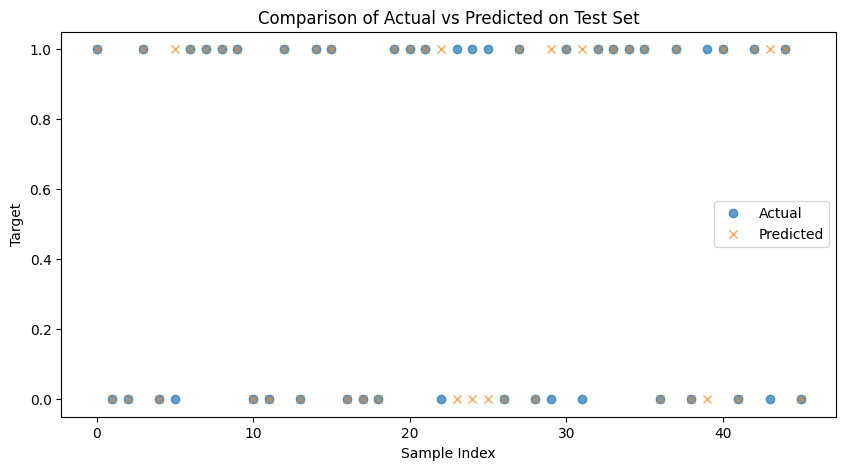

In [33]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, 'o', label='Actual', alpha=0.7)
plt.plot(range(len(y_test)), y_test_pred, 'x', label='Predicted', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.title('Comparison of Actual vs Predicted on Test Set')
plt.legend()
plt.show()